# Necessary packages and loading libraries

In [7]:
!pip install matplotlib -q
!pip install seaborn -q

In [44]:
import os

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error



sns.set_style("whitegrid")

print("Libraries successfully imported")

Libraries successfully imported


# Loading Data 

In [13]:
os.getcwd()

'/Users/h/Documents/Trials/solar-power-forecasting/notebooks'

In [14]:
power_df = pd.read_csv('../data/Plant_1_Generation_Data.csv')
weather_df = pd.read_csv('../data/Plant_1_Weather_Sensor_Data.csv')

In [15]:
print("\n Power Generation Data")
print(power_df.head())


 Power Generation Data
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  


In [17]:
print("\n Weather Sensor Data")
print(weather_df.head())


 Weather Sensor Data
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  


Based on the above inspection of the first few values in the data set, we can observe that we have the following common attributes:

    * DATE_TIME : We have the date and time of each recoreded observation at a 15 minute interval. 
    * PLANT_ID : The plant ID is common for the generation data and weather data as we are working on the same plant. 

Now we have different values that are recorded for the generation and wether data. 

Generation Data : 

    * SOURCE_KEY : Inverter ID
    * DC_POWER : Amount of DC power generated by the inverter in 15 minutes measured in kW 
    * AC_POWER : Amout of AC power generated by inverter in the 15 minutes measured in kW
    * DAILY_YIELD : Cummulative sum of power generated for that day 
    * TOTAL_YIELD : Total yield for the inverter until that point in time

Weather Data: 

     * SOURCE_KEY : Sensor panel id, common for the entire plant as there is only one panel sensor. 
     * AMBIENT_TEMP : Ambient temperature at that plant 
     * MODULE_TEMP : Module attached to (solar panel) attached to sensor panel. Temperature reading for module. 
     * IRRADATION: Amount of radiation for 15 minute interval. 
     


We need to preprocess the data, in this instance the first conversion that is required is that we need to convert the datetime series so that we can have uniformity between both dataset. 

In [24]:
#Convert date-time columns to datetime objects
power_df['DATE_TIME'] = pd.to_datetime(power_df['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_df['DATE_TIME'] = pd.to_datetime(weather_df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [29]:
print("Data Types after conversion")
print('\n Power DF')
print(power_df.info())

Data Types after conversion

 Power DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None


In [30]:
print("Data Types after conversion")
print('\n Weather DF')
print(weather_df.info())

Data Types after conversion

 Weather DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 non-null   object        
 3   AMBIENT_TEMPERATURE  3182 non-null   float64       
 4   MODULE_TEMPERATURE   3182 non-null   float64       
 5   IRRADIATION          3182 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB
None


In [31]:
df = pd.merge(power_df, weather_df, on = 'DATE_TIME', how = 'inner')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   PLANT_ID_x           68774 non-null  int64         
 2   SOURCE_KEY_x         68774 non-null  object        
 3   DC_POWER             68774 non-null  float64       
 4   AC_POWER             68774 non-null  float64       
 5   DAILY_YIELD          68774 non-null  float64       
 6   TOTAL_YIELD          68774 non-null  float64       
 7   PLANT_ID_y           68774 non-null  int64         
 8   SOURCE_KEY_y         68774 non-null  object        
 9   AMBIENT_TEMPERATURE  68774 non-null  float64       
 10  MODULE_TEMPERATURE   68774 non-null  float64       
 11  IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(2)
memory usage: 6.3+ MB


In [33]:
print("\nMerged DataFrame:")
display(df.head())


Merged DataFrame:


,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0


# Visualisation

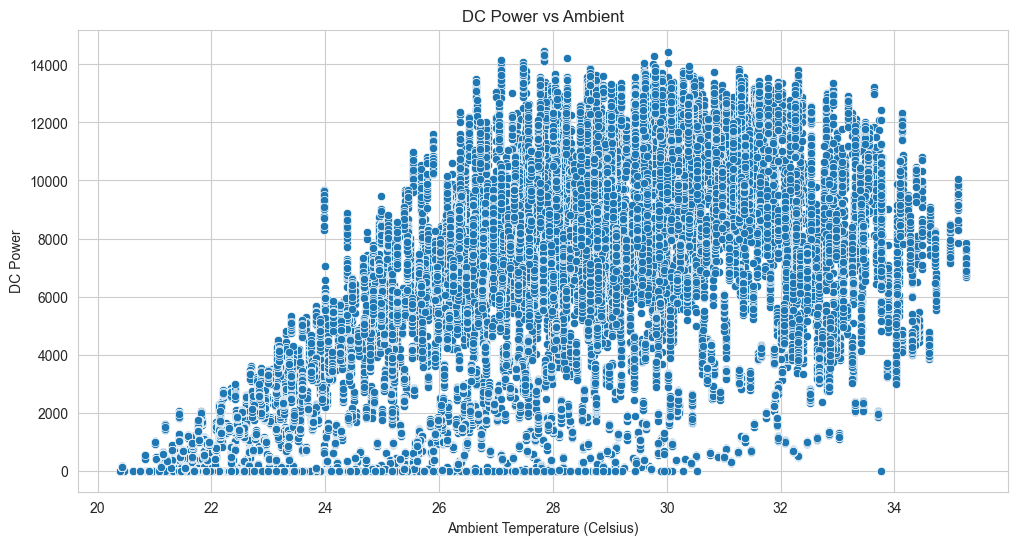

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = "AMBIENT_TEMPERATURE", y = "DC_POWER", data = df)
plt.title("DC Power vs Ambient")
plt.xlabel("Ambient Temperature (Celsius)")
plt.ylabel("DC Power")
plt.show()

We see a positive correlation between Ambient Temperature and DC Power. 

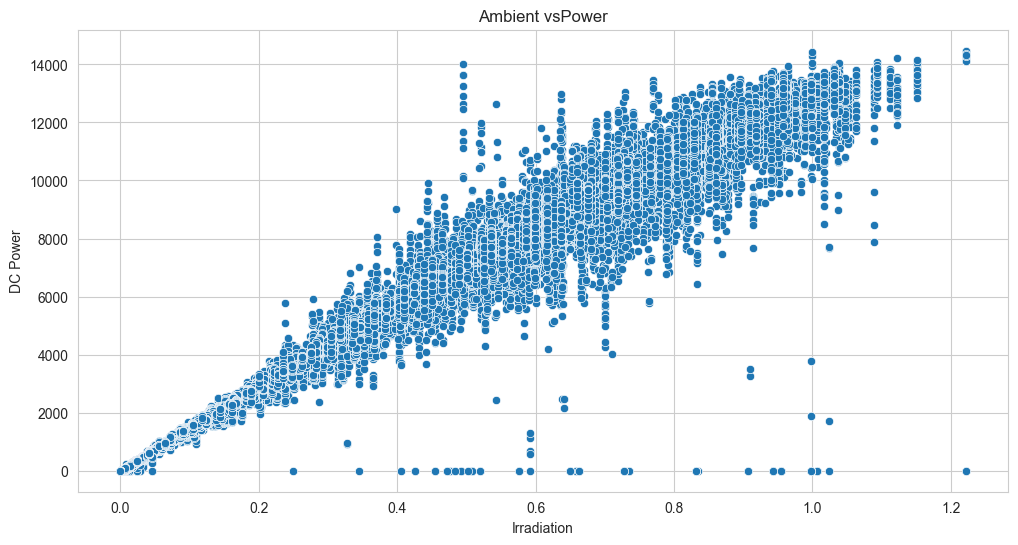

In [43]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = "IRRADIATION", y= "DC_POWER", data = df)
plt.title("Ambient vsPower")
plt.xlabel("Irradiation")
plt.ylabel("DC Power")
plt.show()

Here we can see a stronger positive correlation between irradiation and DC power. So based on these two feature, specificaly ambient temperature and irradiation we can build a very simple model using linear regression for our target attribute DC power. 

In [46]:
features = ["AMBIENT_TEMPERATURE", "IRRADIATION"]
target = "DC_POWER"

After selecting our attributes and target, we will be subsetting from our orignal dataframe. This will allow us to create an X variables that will be reprepsenting our attributes and a y variable for our target variables. Then we will proceed to split the training and test set so that we could train our model, and conduct some prediction. 

In [50]:
X = df[features]
y = df[target]

# Training data 80% and the remaining will be our test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now we can model. 

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Now that we have our model we can predict on our test data. 

In [53]:
y_pred = model.predict(X_test)

Now that we have our predicted values, we can evaluate and see how they perform. 

In [54]:
mae = mean_absolute_error(y_test, y_pred)

In [55]:
print(f"\nModel Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f} kW")


Model Performance on Test Set:
Mean Absolute Error (MAE): 268.50 kW


Our model is off by 268.5 kW on average. 

Now that we have created this notebook to ensure the viability of our data what we need to do next for deploying are two things:

* First we need a script that will handle the training and saves the training, trained model.
* Then we need another scropt for the web application that will load the model we have saved and serves as prediction to the user.


So in general, we will be separating the project where we would have the first instance that would be the training and then the second step wich would the inference aspect. 